## Objective: Prediction of House Price Using Linear Regression

In [1]:
#import the necessary libraries required  (https://justpaste.it/1ok6q)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import plotly.express as px
import scipy
import matplotlib.image as mpimg
from pandas.plotting import scatter_matrix
from scipy.stats import norm
from numpy.random import randn
from statsmodels.stats.proportion import proportions_ztest
import plotly.graph_objects as go
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score, mean_squared_error
#%matplotlib notebook
%matplotlib inline

#Supress warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

C:\Users\Dev\anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically w

In [2]:
from ml_utility import seaprate_features
from ml_utility import boxplot
from ml_utility import missing_data
from ml_utility import feature_scaling

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
numerical_features, categorical_features = seaprate_features(df)

[INFO] Found 9 Numerical Features and 1 Categorical Features


## EDA

####  checking the scattering of latitude and longitude where it is high north or west.

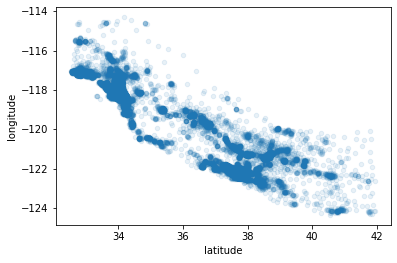

In [6]:
df.plot(kind = 'scatter', x = 'latitude', y = 'longitude', alpha = 0.1)
plt.show()

population more scattered where shown by blue colour
dark blue portion for latitude is high at north and 
                   for longitude it is dark and scattered more at east region from -120 to -124 .

#### at these locations where population is dense and what is the median_house_value (costlier or cheap) at that area

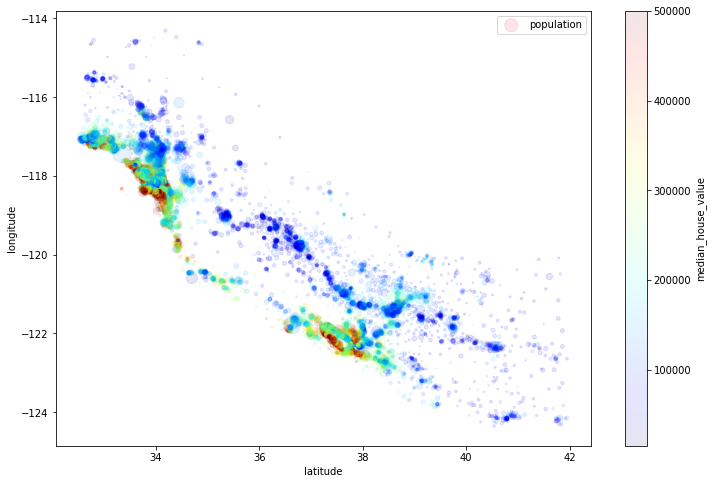

In [7]:
df.plot(kind = 'scatter', 
        x = 'latitude',
        y = 'longitude',
        alpha = 0.1,
        s = df['population']/100, 
        label = 'population',
        figsize = (12,8), 
        c = 'median_house_value' ,
        cmap = plt.get_cmap('jet'), 
        sharex = False)

plt.legend()
plt.show()

red colour shows the most dense and costly house. bubble is population and color indicates median_house_value

#### maping the same analysis via California real map

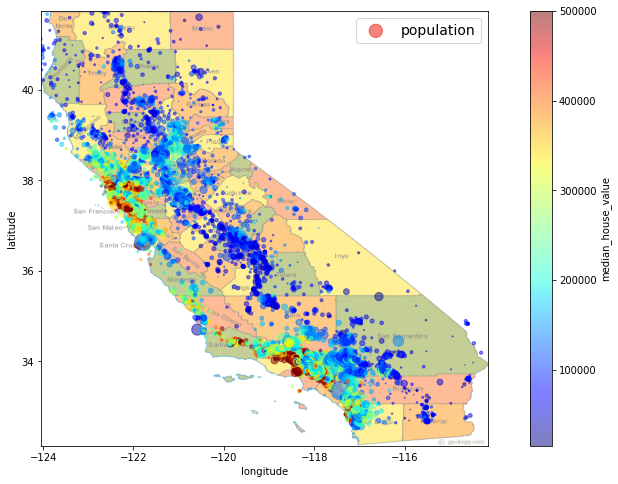

In [8]:
import matplotlib.image as mpimg
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.5,
                  s = df['population']/100, label = 'population', figsize = (15,8),
             c = 'median_house_value' , cmap = plt.get_cmap('jet'), sharex = False)

california_img = mpimg.imread("california_map.png")

plt.imshow(california_img, extent = [-124.05 , -114.15, 32.13, 41.75], alpha = 0.8, cmap = plt.get_cmap('jet'))

plt.ylabel = ('latitude')
plt.xlabel = ('longitude')

plt.legend(fontsize = 14)
plt.show()

#### separate distribution of each and every numerical features, 

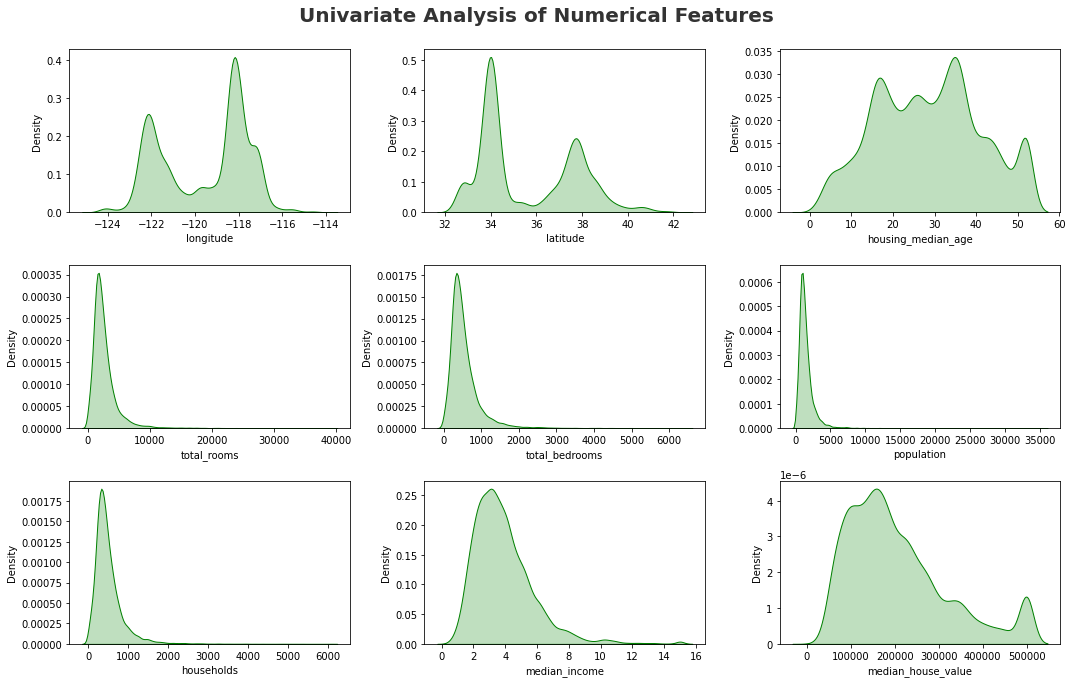

In [9]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='g')
    plt.xlabel = (numerical_features[i])
    plt.tight_layout()

the index of numerical features from 3 to 7 are right skewed also known as log distribution and index 8 is right-skewed.
              the index 0,1 are bimodal distributed and 2 is multimodal disrtibuted

#### checking where the location of houses is highest near the ocean_proximity

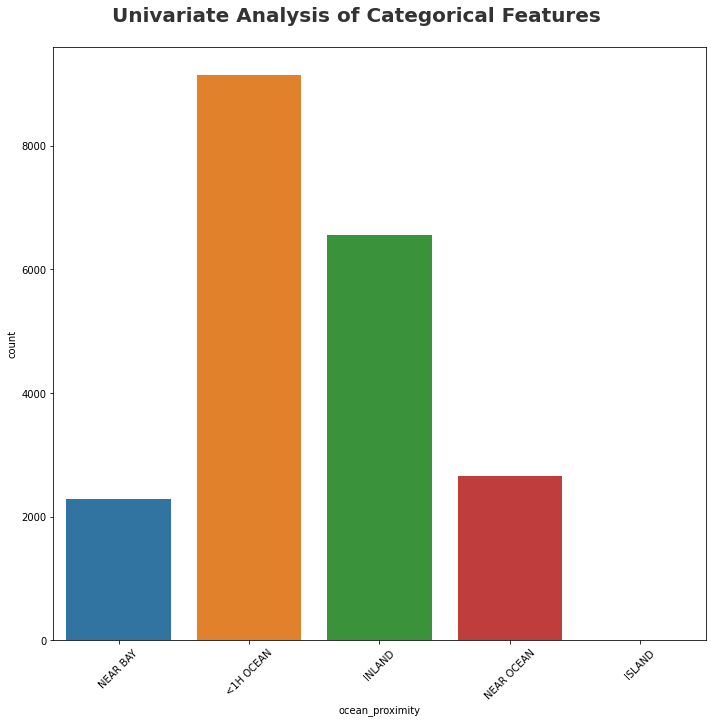

In [10]:
plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(1, 1, i+1)
    sns.countplot(x = df[categorical_features[i]])
    plt.xticks(rotation=45)
    plt.xlabel = (categorical_features[i])
    plt.tight_layout()


the analysis shows that population or households prefers <1H ocean location as the most preferred one.
second preference of people of California will be INLAND.
less to NEAR OCEAN and than NEAR BAY respectively
shows the data is imbalanced as island as less or nrgligible preferences.

#### analysing more than one numerical features together

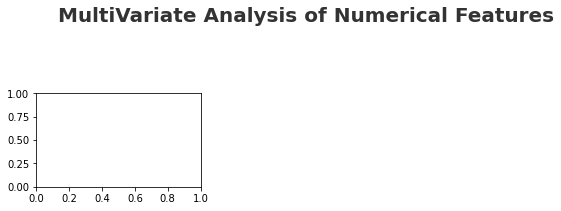

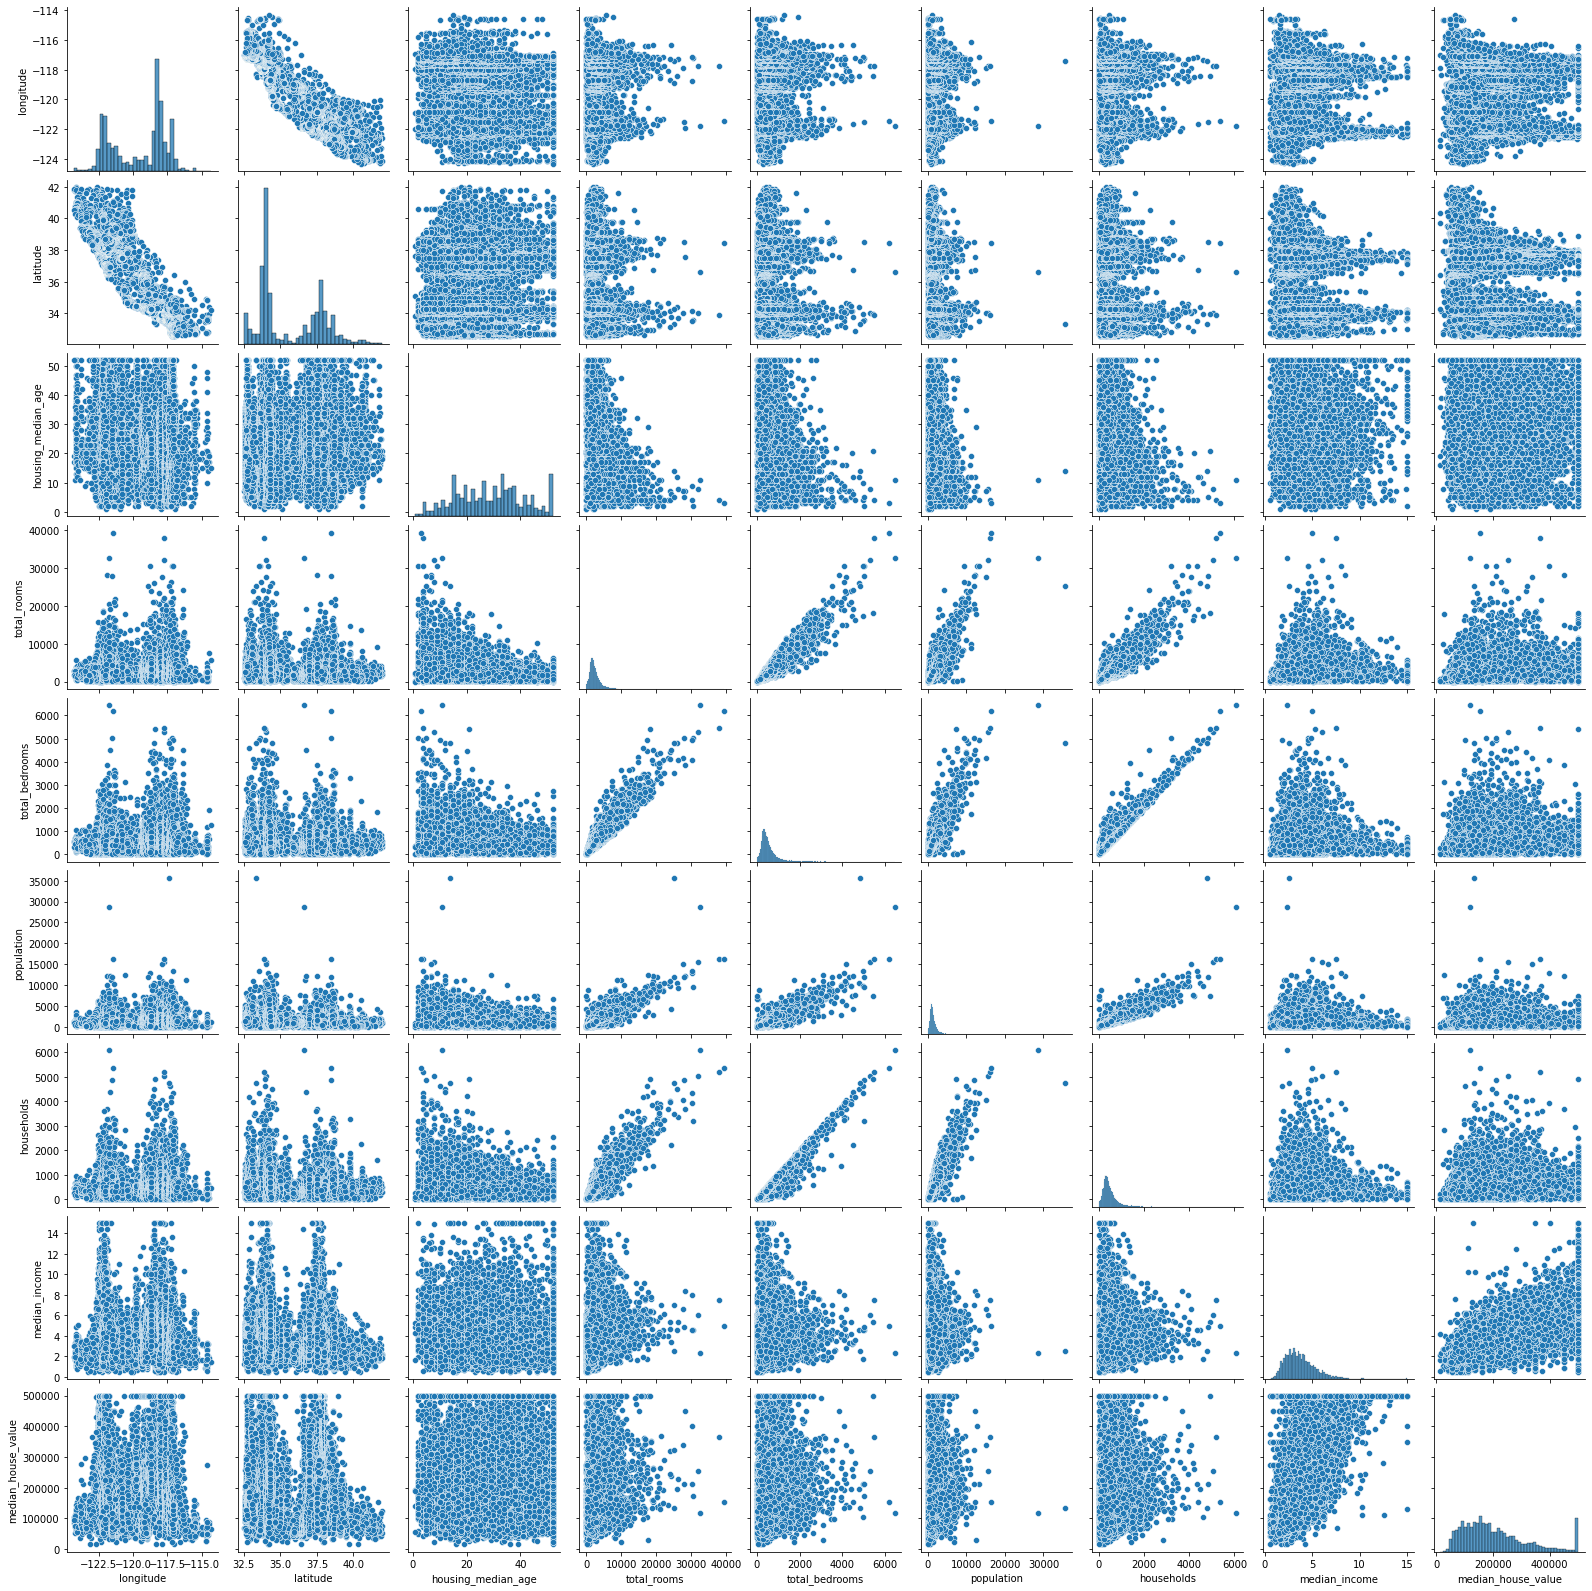

In [11]:
plt.figure(figsize=(10, 10))
cat1 = ['ocean_proximity']
for i in range(0, len(cat1), len(numerical_features)):
    plt.subplot(5, 3, i+1)
    plt.suptitle('MultiVariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
    sns.pairplot(df)

by looking at graph some relations are clear at there is positive realtionships like :
                    relation of population with total_rooms , total_bedrooms and households (vice versa)
                the same features together shows normal or skewness distributions

#### correlation of all numerical features together

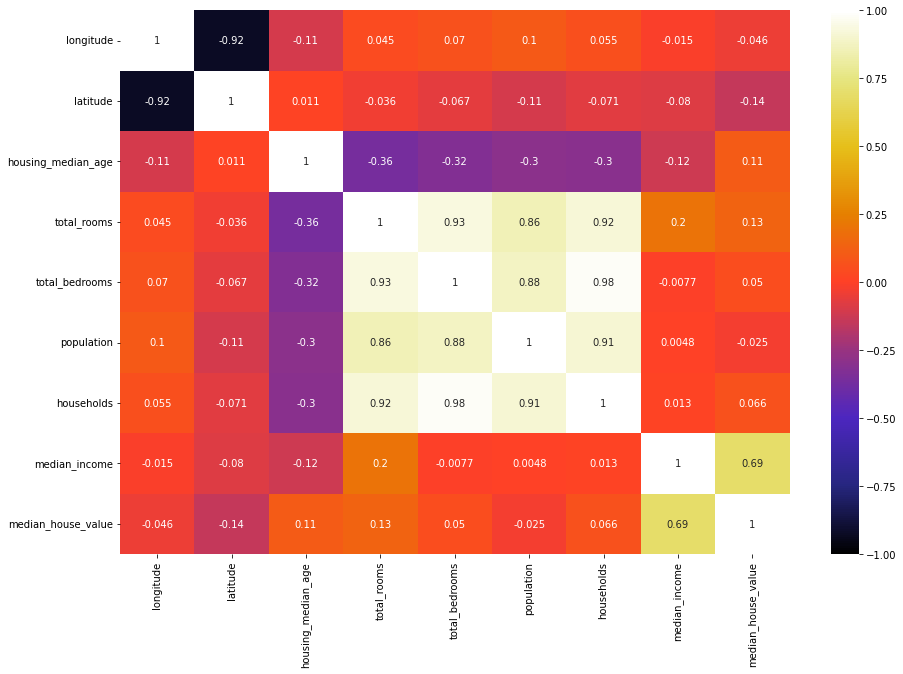

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True, vmax=1.0, vmin=-1.0)
plt.show()


the diagonal are always one and sjows perfect correlation of +1 
                the black colour shows very weak negative correlatio
   the light yellowish shade(in the centre) shows very strong positive relation between
                    population (total_rooms, total_bedrooms and households)
                     total_rooms and total_bedrooms
                     households (total_rooms, total_bedrooms and population)
              0.69 strong positive correlation between median_house_value (USD) and median_income(thousand USD)

#### create boxplot for all numerical features



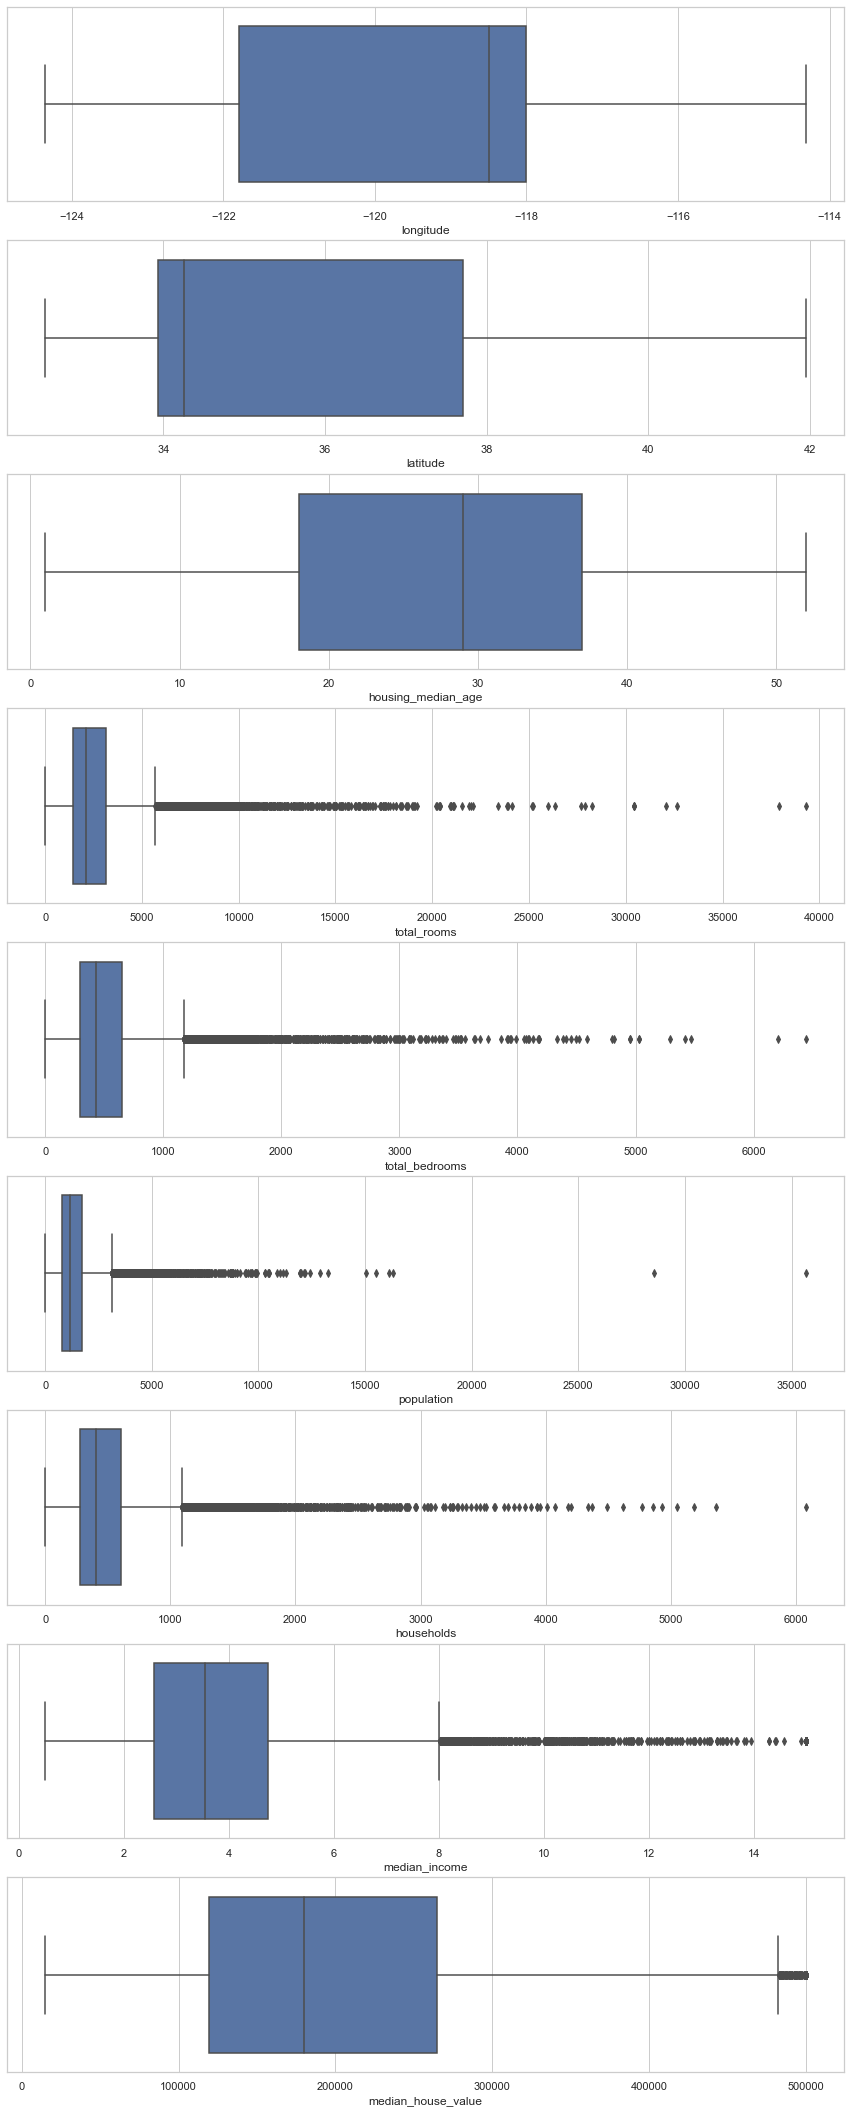

In [13]:
boxplot(df, width=15, height=38)

## Feature Enginnering 

,Total,Percent,Data_Type
total_bedrooms,207,1.0,float64
longitude,0,0.0,float64
latitude,0,0.0,float64
housing_median_age,0,0.0,float64
total_rooms,0,0.0,float64
population,0,0.0,float64
households,0,0.0,float64
median_income,0,0.0,float64
median_house_value,0,0.0,float64
ocean_proximity,0,0.0,object


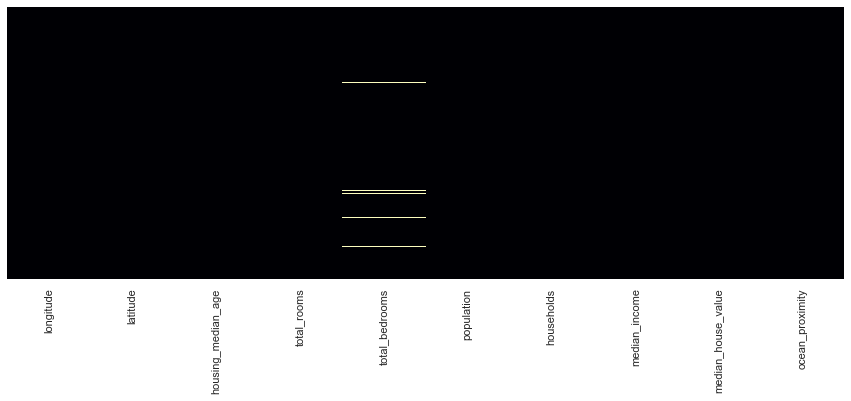

In [14]:
missing_data(df)

In [15]:
def Get_outliers(df,column):
   
    des = df[column].describe()
    
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("[INFO] (IQR = {}) Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    
    data = df[(df[column] < lowerBound) | (df[column] > upperBound)]

    print("[INFO] Total Outliers {1} out of {0}".format(df[column].size, len(data[column])))
   
    outlierRemoved = df[~df[column].isin(data[column])]
    return outlierRemoved

In [16]:
df = Get_outliers(df, "total_rooms")

[INFO] (IQR = 1700.25) Outlier are anything outside this range: (-1102.625,5698.375)
[INFO] Total Outliers 1287 out of 20640


In [17]:

imputer = Imputer(np.nan,strategy ="median")

imputer.fit(df.iloc[:,4:5])

df.iloc[:,4:5] = imputer.transform(df.iloc[:,4:5])
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Label Encoder 

In [18]:
labelEncoder = LabelEncoder()
print(df["ocean_proximity"].value_counts())
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].value_counts()

<1H OCEAN     8590
INLAND        6048
NEAR OCEAN    2530
NEAR BAY      2180
ISLAND           5
Name: ocean_proximity, dtype: int64


0    8590
1    6048
4    2530
3    2180
2       5
Name: ocean_proximity, dtype: int64

## Seprate Features 

In [19]:
y = df["median_house_value"]
X = df.drop("median_house_value", axis=1)

## Data Spliting 

In [20]:
#check for rand_state
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())

print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))


X_train shape (15482, 9) and size 139338
X_test shape (3871, 9) and size 34839
y_train shape (15482,) and size 15482
y_test shape (3871,) and size 3871


## Data Normalization

In [21]:
X_train_scale , X_test_scale , scaler = feature_scaling(X_train, 
                                                        X_test, 
                                                        method = "StandardScaler",
                                                        return_df = False)

## Model Building

### Create Eval Function

In [22]:
def regression_evaluation(y_actual, y_pred, display=False):

    r2=r2_score(y_actual,y_pred)
    adj_r_squre = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
    rmse=np.sqrt(mean_squared_error(y_actual,y_pred))
    
    if display:
        print("[INFO] R Square : {}".format(r2))
        print("[INFO] Adjusted R Square : {}".format(adj_r_squre))
        print("[INFO] RMSE : {}".format(rmse))
        
    return (r2, adj_r_squre, rmse)

### Create Model Function

In [77]:
def regression_model(model_object, X_train, y_train, X_test, y_test, plot=False,data_points=50):
    

    model_object.fit(X_train,y_train)
    y_pred = model_object.predict(X_test)
    r2, adj_r_squre, rmse = regression_evaluation(y_test, y_pred, display=plot)


    if plot:   
        test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
        fig= plt.figure(figsize=(16,8))
        test = test.reset_index()
        test = test.drop(['index'],axis=1)
                     
        if data_points >= 0:

                     
            plt.plot(test[:data_points])
            plt.title("{}".format(str(model_object.__str__).split()[-4]))
            plt.legend(['Actual','Predicted']) 
        else:
            data_points = 50
            plt.plot(test[:data_points])
            plt.title("{}".format(str(model_object.__str__).split()[-4]))
            plt.legend(['Actual','Predicted']) 
                    

    return r2, adj_r_squre, rmse, model_object

### Test Fucntion with Two Models

In [76]:
linearRegModel = LinearRegression(n_jobs=-1)
dtReg = DecisionTreeRegressor()

[INFO] R Square : 0.643868084418727
[INFO] Adjusted R Square : 0.6437023817231663
[INFO] RMSE : 69950.5782213411


(0.643868084418727,
 0.6437023817231663,
 69950.5782213411,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False))

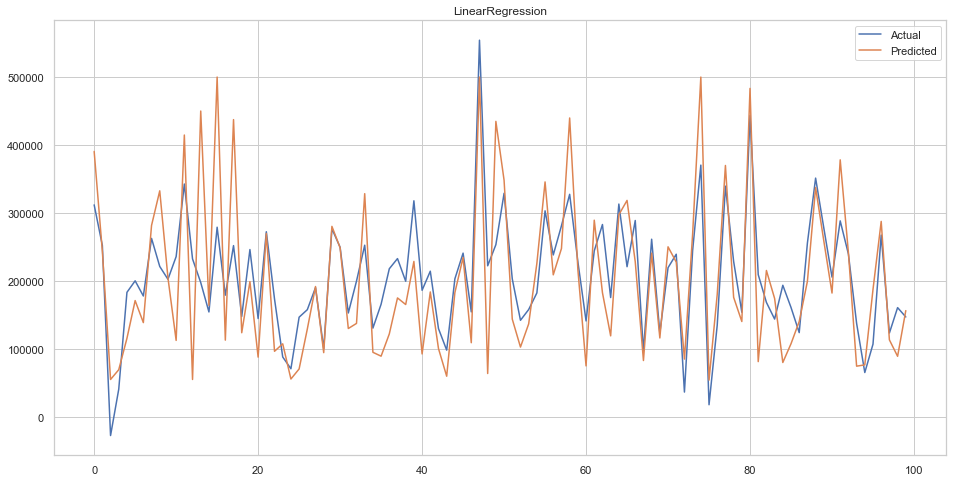

In [78]:
regression_model(model_object=linearRegModel,
                X_train=X_train_scale,
                X_test=X_test_scale,
                y_train=y_train, 
                y_test=y_test,
                plot=True, 
                data_points=100)

[INFO] R Square : 0.6517098474075819
[INFO] Adjusted R Square : 0.6515477933635694
[INFO] RMSE : 69176.16131353495


(0.6517098474075819,
 0.6515477933635694,
 69176.16131353495,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))

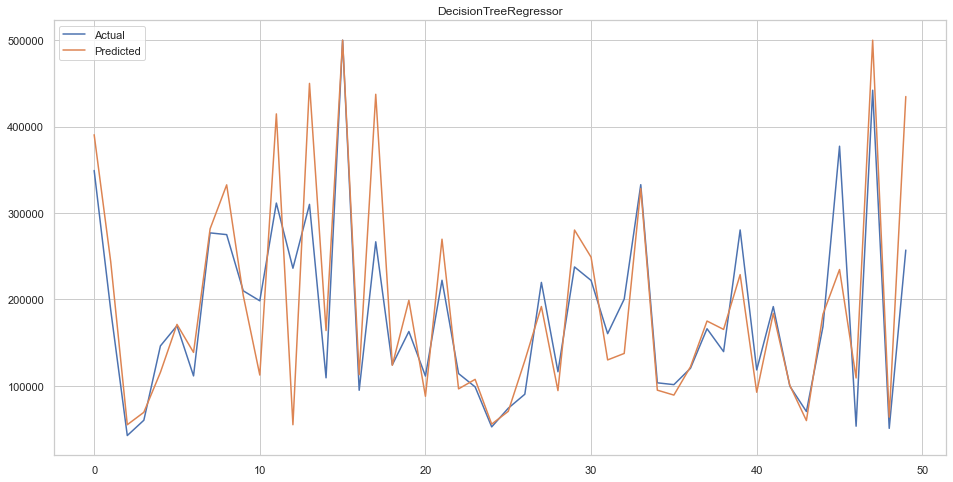

In [79]:
regression_model(model_object=dtReg,
                X_train=X_train_scale,
                X_test=X_test_scale,
                y_train=y_train, 
                y_test=y_test,
                plot=True)

### Regression 

In [62]:
from sklearn.linear_model import LinearRegression   
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import   AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import time
from tqdm import tqdm_notebook as tqdm

In [155]:
def regression_model_analysis(X_train, y_train, X_test, y_test, plot=False, get_best=True, metrics="Adjusted Rsqure" ):
    
    # create model objects

    models = {"Linear Regression":LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR(kernel='linear'),
    "Linear SVR": LinearSVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "KNeighbors Regressor":KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor()
    }

    
    # create acc variables
    models_name = []
    all_r2 = []
    all_adj = []
    all_rmse = []
    time_taken = []
    all_models = []

    counter =  0
    
    
    # run foor loop on all models 
    with tqdm(total=len(models)) as pbar:
        for name, model in models.items():

            start = time.time()
            r2, adj_r_squre, rmse, model_object = regression_model(model_object=model,
                                                                   X_train=X_train,
                                                                   X_test=X_test,
                                                                   y_train=y_train, 
                                                                   y_test=y_test,
                                                                   plot=plot)

            t = time.time() - start
            
            
            models_name.append(name)
            all_r2.append(round(r2,2))
            all_adj.append(round(adj_r_squre,2))
            all_rmse.append(round(rmse,2))
            time_taken.append(t)
            all_models.append(model_object)
            pbar.update(1)

    # creat report for acc
    model_report = pd.DataFrame({"Model Name":models_name,
                                "R Squre":all_r2,
                                "Adjusted Rsqure": all_adj,
                                "RMSE":all_rmse,
                                "Time Taken":time_taken})
    # return best model
    if get_best:
        best_model_name = tuple(model_report[model_report[metrics] == model_report[metrics].max()]["Model Name"])[0]
        best_model_obj = models[best_model_name]
        
        return model_report, best_model_obj
    return model_report, None


In [144]:
report, best_model = regression_model_analysis(X_train=X_train_scale,
                X_test=X_test_scale,
                y_train=y_train, 
                y_test=y_test,
                plot=False,
                get_best=True,
                metrics="Adjusted Rsqure")

  0%|          | 0/10 [00:00<?, ?it/s]

In [145]:
r

,Model Name,R Squre,Adjusted Rsqure,RMSE,Time Taken
0,Linear Regression,0.64,0.64,69950.58,0.004876
1,Ridge Regression,0.64,0.64,69951.13,0.002466
2,Lasso Regression,0.64,0.64,69950.74,0.048332
3,Support Vector Regression,0.05,0.05,114264.73,8.312224
4,Linear SVR,-2.65,-2.65,223864.72,0.013658
5,Decision Tree,0.66,0.66,67999.68,0.261088
6,Random Forest Regressor,0.80,0.80,52358.58,1.543436
7,Gradient Boosting Regressor,0.78,0.78,55560.89,1.445820
8,Ada Boost Regressor,0.41,0.41,89725.73,1.181940
9,KNeighbors Regressor,0.72,0.72,61797.71,0.245520


In [146]:
m

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)